# Assignment 5 : Deep learning
<br>Last updated on 11/02/2023</br>


credit : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
seed = 2023
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = True

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
trainvalset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainvalset, [40000, 10000])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(16,16))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Model1: NN

Create a model to have an image of 32*32 pixels as an input with 10 output classes.

The model composes of flatten, dropout 20%, dense with 128 neurons, and output layer (with softmax) to classify each image into 10 classes.
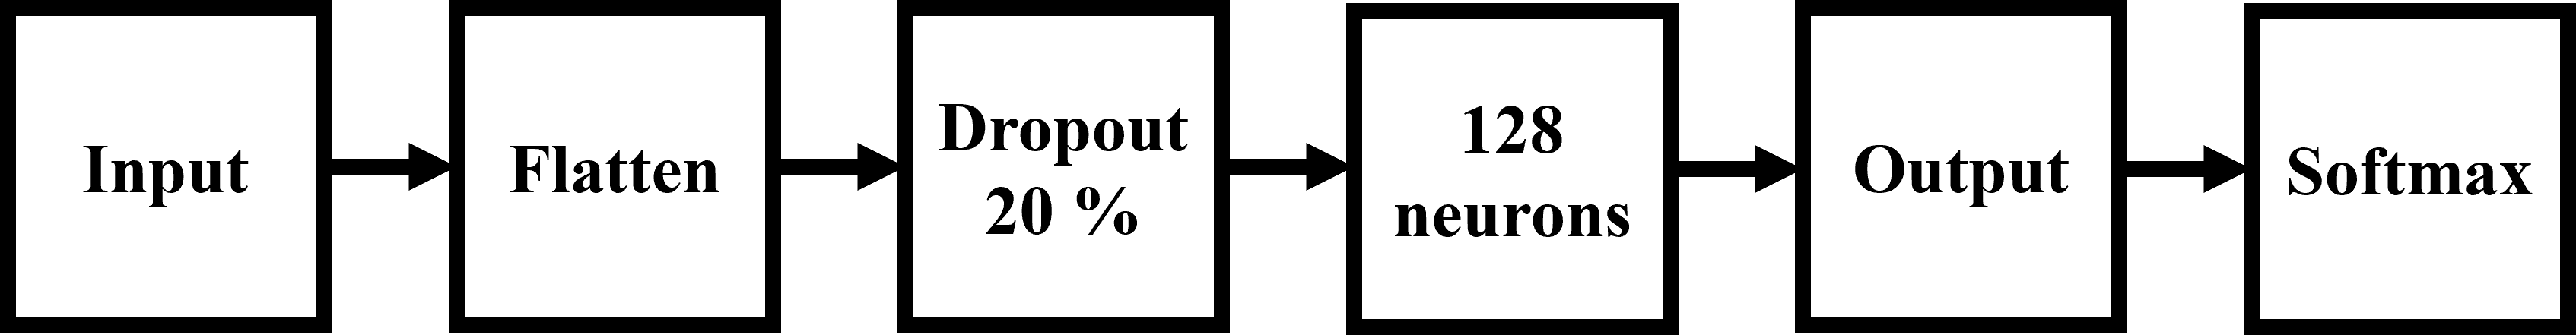

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        '''
        Insert your code here

        '''

    def forward(self, x):
        '''
        Insert your code here

        '''


net = Net().to(device)

Optimizer and criterion

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Training Model

In [ ]:
PATH = './cifar_net.pth'
min_val_loss = 1e10
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    running_val_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        '''
        Insert your code here

        '''
    avg_loss = running_loss/len(trainloader)
    net.eval()
    with torch.no_grad():
        for i,data in enumerate(valloader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            '''
            Insert your code here

            '''

        avg_val_loss = running_val_loss/len(valloader)

    if avg_val_loss < min_val_loss:
        torch.save(net.state_dict(), PATH)
        min_val_loss = avg_val_loss
        print(f"Best model was saved at Epoch {epoch}")

print('Finished Training')
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device)

Evaluation 

In [ ]:
predict = list()
label = list()
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        '''
        Insert your code here

        '''

print("Classification report")
report = classification_report(label, predict,digits=4)
print(report)

# Model2: CNN

Modify Model1:

Before the flatten layer, add 2 layers of Conv2D with kernel(2*2) for 32 and 64 filters with relu activation, respectively.
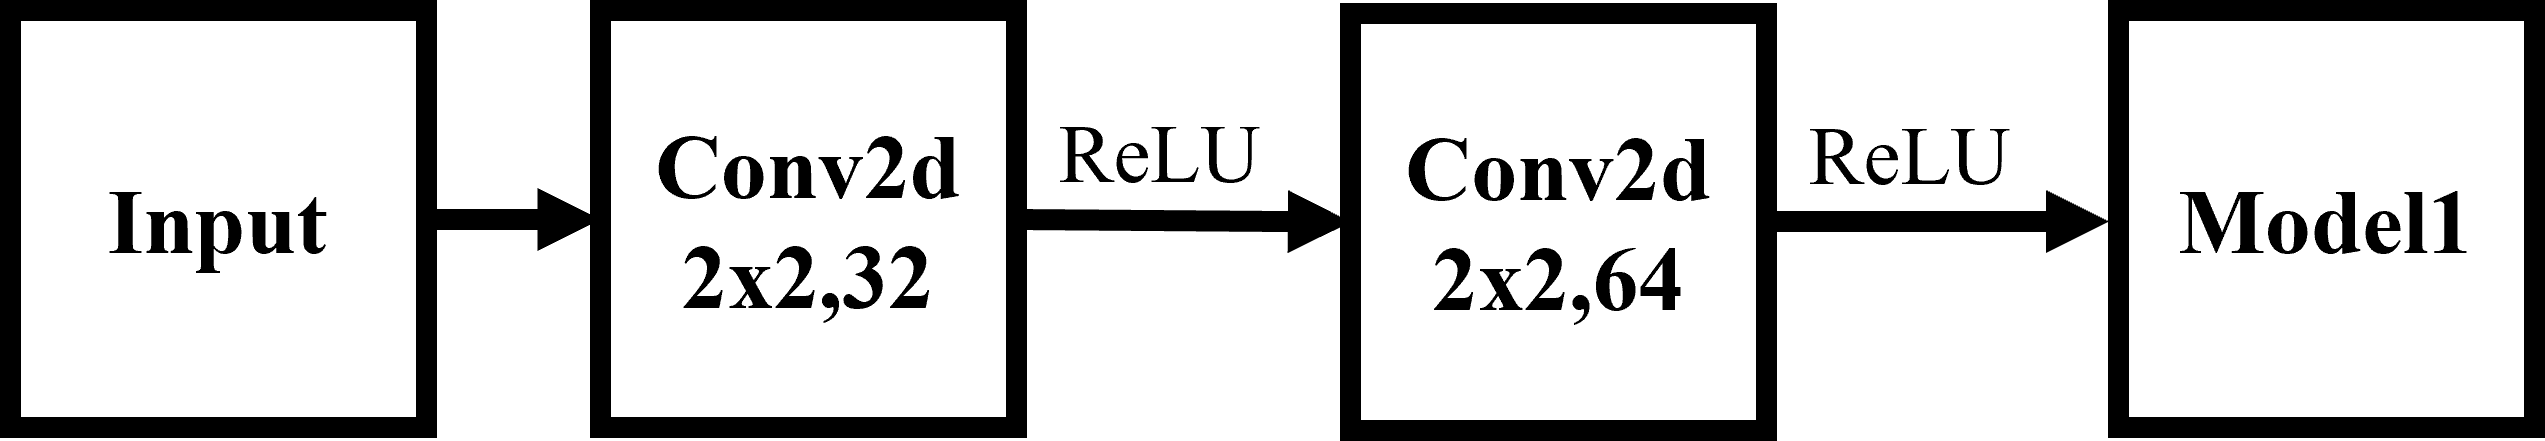

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class CNN1(nn.Module):
    def __init__(self):
        super().__init__()
        '''
        Insert your code here

        '''

    def forward(self, x):
        '''
        Insert your code here

        '''


net = CNN1().to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
PATH = './cifar_CNN1.pth'
min_val_loss = 1e10
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    running_val_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        '''
        Insert your code here

        '''
    avg_loss = running_loss/len(trainloader)
    net.eval()
    with torch.no_grad():
        for i,data in enumerate(valloader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            '''
            Insert your code here

            '''

        avg_val_loss = running_val_loss/len(valloader)

    if avg_val_loss < min_val_loss:
        torch.save(net.state_dict(), PATH)
        min_val_loss = avg_val_loss
        print(f"Best model was saved at Epoch {epoch}")

print('Finished Training')
torch.save(net.state_dict(), PATH)

In [ ]:
net = CNN1()
net.load_state_dict(torch.load(PATH))
net.to(device)

In [ ]:
predict = list()
label = list()
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        '''
        Insert your code here

        '''

print("Classification report")
report = classification_report(label, predict,digits=4)
print(report)

# Model3: CNN with max-pool & dropout

Modify Model2:

After Conv2D layers in Model2, add MaxPooling2D with pooling size (2*2) and then dropout 30%.
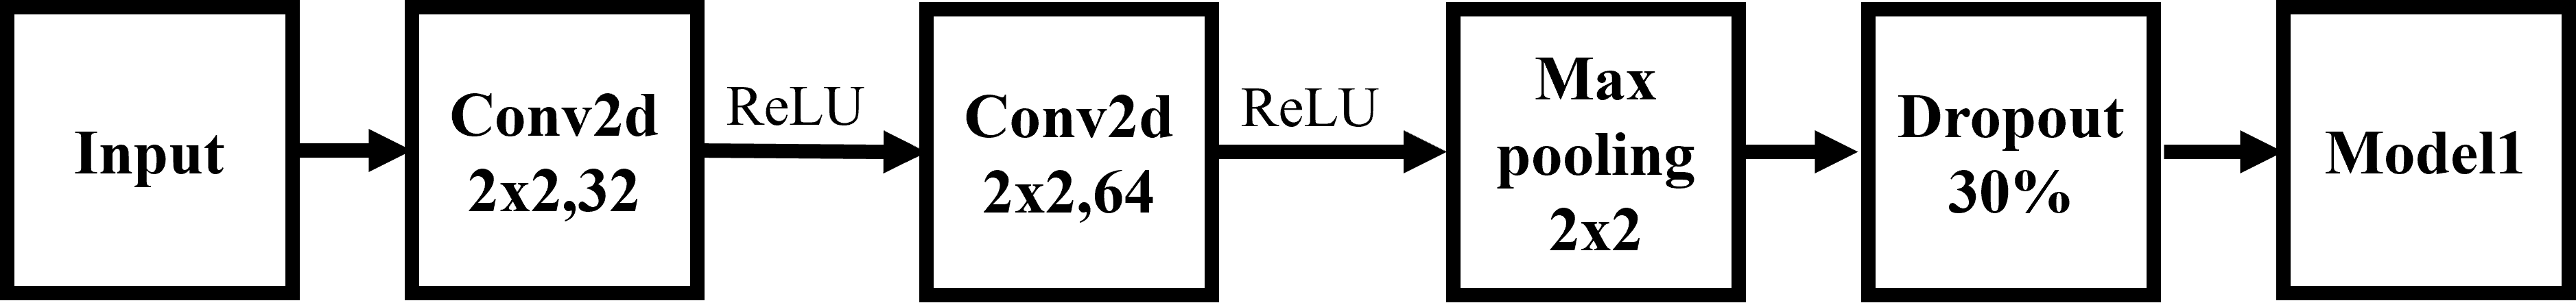

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        '''
        Insert your code here

        '''

    def forward(self, x):
        '''
        Insert your code here

        '''


net = CNN2()..to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
PATH = './cifar_CNN2.pth'
min_val_loss = 1e10
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    running_val_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        '''
        Insert your code here

        '''
    avg_loss = running_loss/len(trainloader)
    net.eval()
    with torch.no_grad():
        for i,data in enumerate(valloader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            '''
            Insert your code here

            '''

        avg_val_loss = running_val_loss/len(valloader)

    if avg_val_loss < min_val_loss:
        torch.save(net.state_dict(), PATH)
        min_val_loss = avg_val_loss
        print(f"Best model was saved at Epoch {epoch}")

print('Finished Training')
torch.save(net.state_dict(), PATH)

In [ ]:
net = CNN2()
net.load_state_dict(torch.load(PATH))
net.to(device)

In [ ]:
predict = list()
label = list()
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        '''
        Insert your code here

        '''

print("Classification report")
report = classification_report(label, predict,digits=4)
print(report)